## Question 3

a. What is the probability of the word “data” occurring in each line ?

b. What is the distribution of distinct word counts across all the lines ?

c. What is the probability of the word “analytics” occurring after the word “data” ?

First we need to import required libraries to work with our text data

One of the most important libraries to use here is nltk

In [17]:
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import regex as re
import string
import nltk

In [18]:
# importing the text data from the folder Data
L = []
with open("../Data/text.txt","r") as text:
    lines = text.readlines()
    for ind, line in enumerate(lines[:-1]):
        L.append(line)
df = pd.DataFrame({'Sentence':L})
df
        

,Sentence
0,"As a term, data analytics predominantly refers..."
1,"intelligence (BI), reporting and online analyt..."
2,"analytics. In that sense, it's similar in natu..."
3,approaches to analyzing data -- with the diffe...
4,data analytics has a broader focus. The expans...
5,"cases, people use data analytics specifically ..."
6,category. Data analytics initiatives can help ...
7,"efficiency, optimize marketing campaigns and c..."
8,emerging market trends and gain a competitive ...
9,boosting business performance. Depending on th...


We have used simple python commands and pandas dataframe to create a database of sentence

In [19]:
# Text preprocessing Function
import string
def text_cleaning(text):
    text = text.lower()
    # Removing all the punctutions that appear in every sentence so we have clean data
    text = text.translate(str.maketrans('','',string.punctuation))
    # Removing all the numbers in the text
    text = re.sub('\w*\d\w*','',text)
    # Removing new lines
    text = re.sub('\n','',text)
    # Removing any non-english characters
    text = re.sub('([^\x00-\x7F])+','',text)
    return text

text_cleaner = lambda x:text_cleaning(x)


Storing the cleaned sentences in a new column

In [37]:
df['Fresh_Sentence'] = pd.DataFrame(df['Sentence'].apply(text_cleaner))
df

,Sentence,Fresh_Sentence,WordBasedTokenized,WordCount
0,"As a term, data analytics predominantly refers...",as a term data analytics predominantly refers ...,"[term, data, analytics, predominantly, refers,...","{'as': 1, 'a': 1, 'term': 1, 'data': 1, 'analy..."
1,"intelligence (BI), reporting and online analyt...",intelligence bi reporting and online analytica...,"[intelligence, bi, reporting, online, analytic...","{'intelligence': 1, 'bi': 1, 'reporting': 1, '..."
2,"analytics. In that sense, it's similar in natu...",analytics in that sense its similar in nature ...,"[analytics, sense, similar, nature, business, ...","{'analytics': 2, 'in': 2, 'that': 1, 'sense': ..."
3,approaches to analyzing data -- with the diffe...,approaches to analyzing data with the differe...,"[approaches, analyzing, data, difference, latt...","{'approaches': 1, 'to': 2, 'analyzing': 1, 'da..."
4,data analytics has a broader focus. The expans...,data analytics has a broader focus the expansi...,"[data, analytics, broader, focus, expansive, v...","{'data': 1, 'analytics': 1, 'has': 1, 'a': 1, ..."
5,"cases, people use data analytics specifically ...",cases people use data analytics specifically t...,"[cases, people, use, data, analytics, specific...","{'cases': 1, 'people': 1, 'use': 1, 'data': 1,..."
6,category. Data analytics initiatives can help ...,category data analytics initiatives can help b...,"[category, data, analytics, initiatives, help,...","{'category': 1, 'data': 1, 'analytics': 1, 'in..."
7,"efficiency, optimize marketing campaigns and c...",efficiency optimize marketing campaigns and cu...,"[efficiency, optimize, marketing, campaigns, c...","{'efficiency': 1, 'optimize': 1, 'marketing': ..."
8,emerging market trends and gain a competitive ...,emerging market trends and gain a competitive ...,"[emerging, market, trends, gain, competitive, ...","{'emerging': 1, 'market': 1, 'trends': 1, 'and..."
9,boosting business performance. Depending on th...,boosting business performance depending on the...,"[boosting, business, performance, depending, p...","{'boosting': 1, 'business': 1, 'performance': ..."


Stop words are words that you want to ignore, so you filter them out of your text when you’re processing it. Very common words like 'in', 'is', and 'an' are often used as stop words since they don’t add a lot of meaning to a text in and of themselves.

In [21]:
from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

In [22]:
stop_words = set(stopwords.words("english"))
df['WordBasedTokenized'] = None
for i in df.index:
    TokenizedSentence = word_tokenize(df['Fresh_Sentence'][i])
    df['WordBasedTokenized'][i] = [word for word in TokenizedSentence if word not in stop_words]
df.head()

,Sentence,Fresh_Sentence,WordBasedTokenized
0,"As a term, data analytics predominantly refers...",as a term data analytics predominantly refers ...,"[term, data, analytics, predominantly, refers,..."
1,"intelligence (BI), reporting and online analyt...",intelligence bi reporting and online analytica...,"[intelligence, bi, reporting, online, analytic..."
2,"analytics. In that sense, it's similar in natu...",analytics in that sense its similar in nature ...,"[analytics, sense, similar, nature, business, ..."
3,approaches to analyzing data -- with the diffe...,approaches to analyzing data with the differe...,"[approaches, analyzing, data, difference, latt..."
4,data analytics has a broader focus. The expans...,data analytics has a broader focus the expansi...,"[data, analytics, broader, focus, expansive, v..."


Now all the stop words are removed we are continuing with out text preprocessing

Now Let's count words in each cell in Fresh_Sentence Column

In [29]:
def WordCount(df):
    out = []
    for sent in df.Fresh_Sentence.values:
        Word = dict()
        words = sent.split()
        for word in words:
            if word in Word:
                Word[word] += 1
            else:
                Word[word] = 1
        out.append(Word)  
    df['WordCount']=out

In [30]:
WordCount(df)

#### Lemmentizing

lemmatizing reduces words to their core meaning, but it will give us a complete English word that makes sense on its own instead of just a fragment of a word.

In [34]:
from nltk.stem import WordNetLemmatizer
# nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/Armin/nltk_data...


True

In [49]:
lemmatizer = WordNetLemmatizer()
df['WBT_Lemmanted'] = None
for i in df.index:
    lemmanted_words = [lemmatizer.lemmatize(word) for word in df['WordBasedTokenized'][i]]
    df.at[i,'WBT_Lemmanted'] = lemmanted_words
df.head()

,Sentence,Fresh_Sentence,WordBasedTokenized,WordCount,WBT_Lemmanted
0,"As a term, data analytics predominantly refers...",as a term data analytics predominantly refers ...,"[term, data, analytics, predominantly, refers,...","{'as': 1, 'a': 1, 'term': 1, 'data': 1, 'analy...","[term, data, analytics, predominantly, refers,..."
1,"intelligence (BI), reporting and online analyt...",intelligence bi reporting and online analytica...,"[intelligence, bi, reporting, online, analytic...","{'intelligence': 1, 'bi': 1, 'reporting': 1, '...","[intelligence, bi, reporting, online, analytic..."
2,"analytics. In that sense, it's similar in natu...",analytics in that sense its similar in nature ...,"[analytics, sense, similar, nature, business, ...","{'analytics': 2, 'in': 2, 'that': 1, 'sense': ...","[analytics, sense, similar, nature, business, ..."
3,approaches to analyzing data -- with the diffe...,approaches to analyzing data with the differe...,"[approaches, analyzing, data, difference, latt...","{'approaches': 1, 'to': 2, 'analyzing': 1, 'da...","[approach, analyzing, data, difference, latter..."
4,data analytics has a broader focus. The expans...,data analytics has a broader focus the expansi...,"[data, analytics, broader, focus, expansive, v...","{'data': 1, 'analytics': 1, 'has': 1, 'a': 1, ...","[data, analytics, broader, focus, expansive, v..."


Finding out the probablity of wth word: Data

In [54]:
# Finding the number of words in each line
df['NoWords'] = None
for i in df.index:
    df['NoWords'][i] = len(df['WBT_Lemmanted'][i])
df.head()

,Sentence,Fresh_Sentence,WordBasedTokenized,WordCount,WBT_Lemmanted,NoWords
0,"As a term, data analytics predominantly refers...",as a term data analytics predominantly refers ...,"[term, data, analytics, predominantly, refers,...","{'as': 1, 'a': 1, 'term': 1, 'data': 1, 'analy...","[term, data, analytics, predominantly, refers,...",9
1,"intelligence (BI), reporting and online analyt...",intelligence bi reporting and online analytica...,"[intelligence, bi, reporting, online, analytic...","{'intelligence': 1, 'bi': 1, 'reporting': 1, '...","[intelligence, bi, reporting, online, analytic...",10
2,"analytics. In that sense, it's similar in natu...",analytics in that sense its similar in nature ...,"[analytics, sense, similar, nature, business, ...","{'analytics': 2, 'in': 2, 'that': 1, 'sense': ...","[analytics, sense, similar, nature, business, ...",9
3,approaches to analyzing data -- with the diffe...,approaches to analyzing data with the differe...,"[approaches, analyzing, data, difference, latt...","{'approaches': 1, 'to': 2, 'analyzing': 1, 'da...","[approach, analyzing, data, difference, latter...",8
4,data analytics has a broader focus. The expans...,data analytics has a broader focus the expansi...,"[data, analytics, broader, focus, expansive, v...","{'data': 1, 'analytics': 1, 'has': 1, 'a': 1, ...","[data, analytics, broader, focus, expansive, v...",10


In [85]:
for i in df.index:
    for j,k in df['WordCount'][0].items():
        if j == 'data':
            dataProb = (k/df['NoWords'][i])
    print(f'The probablity of word data in line {i+1} is {dataProb:0.2f}')

The probablity of word data in line 1 is 0.11
The probablity of word data in line 2 is 0.10
The probablity of word data in line 3 is 0.11
The probablity of word data in line 4 is 0.12
The probablity of word data in line 5 is 0.10
The probablity of word data in line 6 is 0.08
The probablity of word data in line 7 is 0.10
The probablity of word data in line 8 is 0.11
The probablity of word data in line 9 is 0.11
The probablity of word data in line 10 is 0.11
The probablity of word data in line 11 is 0.12
The probablity of word data in line 12 is 0.10
The probablity of word data in line 13 is 0.08
The probablity of word data in line 14 is 0.11
The probablity of word data in line 15 is 0.10
The probablity of word data in line 16 is 0.10
The probablity of word data in line 17 is 0.08
The probablity of word data in line 18 is 0.10
The probablity of word data in line 19 is 0.14
The probablity of word data in line 20 is 0.14
The probablity of word data in line 21 is 0.09


Now we are going to deal with the whole text

In [115]:
# Indexes of each word and the word
out = []
WordsList = df['WordBasedTokenized'].values
for i in df.index:
    for j in WordsList[i]:
        out.append(j)

In [144]:
from collections import Counter, OrderedDict
counts = Counter(out)
WordIndex = pd.DataFrame(counts.most_common(), columns=['Word','Frequency'])
WordIndex.head()

,Word,Frequency
0,data,18
1,analytics,10
2,analysis,6
3,business,4
4,term,3


Text(0.5, 1.0, 'Distribution of distinct word counts across all the lines')

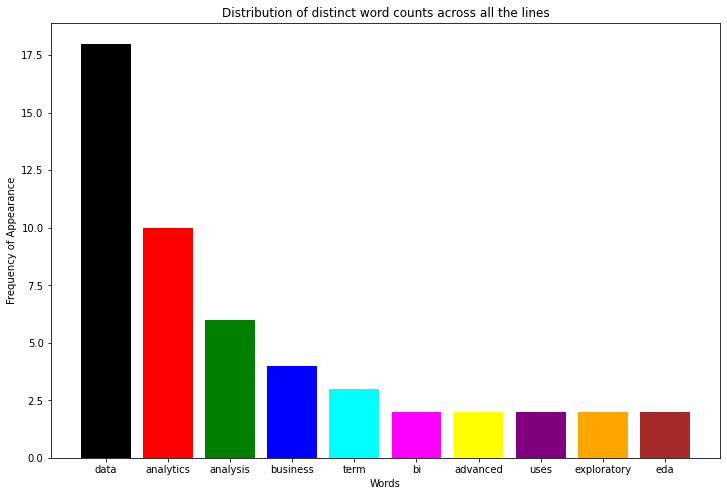

In [154]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.bar(WordIndex['Word'][0:10], WordIndex['Frequency'][0:10],
color=['black', 'red', 'green', 'blue', 'cyan','magenta','yellow','Purple','orange','Brown'])
plt.xlabel('Words')
plt.ylabel('Frequency of Appearance')
plt.title('Distribution of distinct word counts across all the lines')

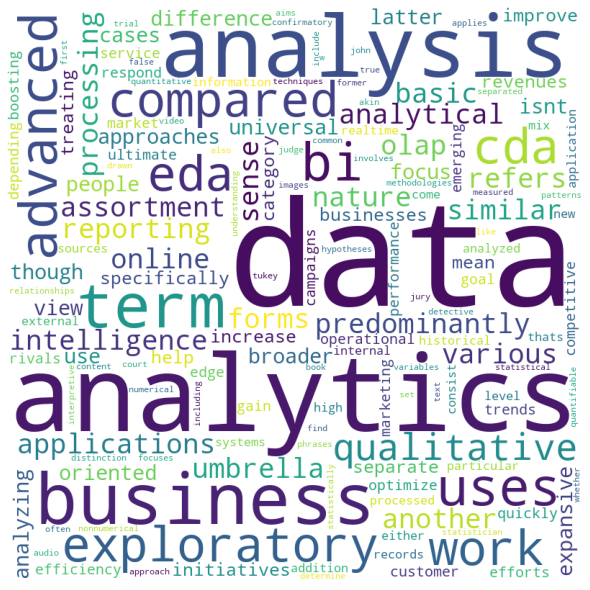

In [158]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate_from_frequencies(counts)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()



Creating the World Cloud for the frequency of each word
To better demonstrate the count of the distinct words

In [161]:
print("The number of distinct words (Without stop words) are: ", len(counts))

The number of distinct words (Without stop words) are:  156


We are going to find the probability of analytics after data

In [166]:
# Reading the whole passage again
with open("Data/text.txt","r") as f:
    passage = f.read()
    passage = text_cleaning(passage)

print(f'Length of the passage is: {len(passage)}')

Length of the passage is: 2036


In [181]:
flag = 0
passage_ls = passage.split(' ')
for w in range(len(passage_ls)):
    if passage_ls[w] == 'analytics':
        if passage_ls[w-1] == 'data':
            flag+=1
    else:
        pass

In [185]:
print(f'The probability of the word “analytics” occurring after the word “data” in the passage is {flag/len(passage_ls)}')

The probability of the word “analytics” occurring after the word “data” in the passage is 0.019169329073482427
